In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

abalone = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", 
                      names=["sex", "length", "diameter", "height", "whole_weight","shucked_weight", "viscera_weight", "shell_weight", "rings"])

In [2]:
abalone['sex'].replace(['M', 'F', 'I'],[0,1,2], inplace=True)
print(abalone.head())

   sex  length  diameter  height  whole_weight  shucked_weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

   viscera_weight  shell_weight  rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


In [3]:
data = abalone.drop(['rings'], axis=1).values
target = abalone['rings'].values

In [4]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=42)

In [5]:
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

C:\Users\Minha\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.7563603992912044 0.24602991326763513


In [6]:
gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

C:\Users\Minha\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.7484273316442311 0.24513528995820016


In [7]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.02807162 0.08090111 0.08684568 0.06396464 0.14662645 0.18643284
 0.12717652 0.27998113]


In [8]:
# Hyper parameter tuning
params = {'max_depth': range(6, 10, 2),
          'min_samples_split': range(10, 20, 2)
}
gs = GridSearchCV(GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)
print(gs.best_params_)
print(gs.best_score_)
print(gs.score(test_input, test_target))

C:\Users\Minha\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 6, 'min_samples_split': 12}
0.23943995417237277
0.25239234449760767


C:\Users\Minha\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


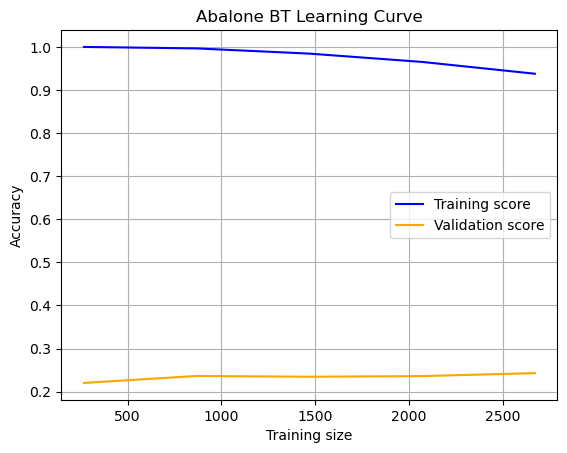

In [9]:
train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingClassifier(max_depth=6, learning_rate=0.1, n_estimators=50, min_samples_split=12),
    train_input,
    train_target,
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.grid()
plt.title('Abalone BT Learning Curve', loc='center')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.plot(train_sizes, train_scores_mean, color='blue', label="Training score")
plt.plot(train_sizes, test_scores_mean, color='orange', label="Validation score")
plt.legend(['Training score', 'Validation score'])
plt.savefig('graph\\abalone_bt_lc.png', format='png')
plt.show()

C:\Users\Minha\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


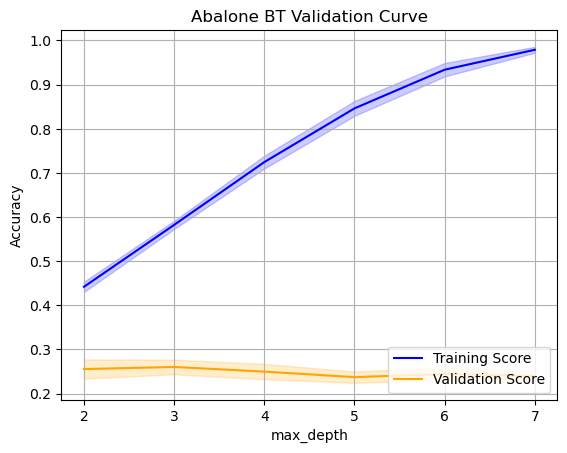

In [10]:
param_name = "max_depth"
param_range = range(2, 8, 1)

train_scores, valid_scores = validation_curve(
    GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, min_samples_split=12), train_input, train_target, param_name=param_name,
    param_range=param_range, cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', label='Training Score')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.2, color='blue')

plt.plot(param_range, test_mean, color='orange', label='Validation Score')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.2, color='orange')

plt.grid()
plt.title('Abalone BT Validation Curve', loc='center')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.savefig('graph\\abalone_bt_vc.png', format='png')
plt.show()